<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week05/Day2/EX2/W5D2EXG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises XP Gold
Last Updated: March 26th, 2024

What will you create
By the end of this exercise, you’ll have written your own K-means clustering function in Python, capable of segmenting a dataset into distinct groups.

You will create scatter plots to visualize the distribution of data points across clusters and the convergence of centroids.

Through your implementation, you’ll generate a report indicating the cluster assignment for each data point in the dataset.

You will also create a function to randomly initialize centroids, which is a crucial part of the K-means algorithm.

By running your K-means implementation with different initializations, you will learn how to evaluate and refine clustering results.



What will you learn
Gain a deep understanding of the K-means clustering algorithm by implementing it from scratch.

Learn how to use Euclidean distance to assess the similarity between data points and centroids.

Understand the impact of initial centroid selection on the clustering outcome and learn methods to initialize centroids.

Discover how the K-means algorithm iteratively refines the positions of centroids to minimize within-cluster variances.

Develop skills to visualize and interpret the resulting clusters and centroids from the K-means algorithm.



You will use the ex7data2.mat dataset, which is a .mat file that contains unlabeled data points. This dataset is typically used to test clustering algorithms.

Tasks:
Understanding the Dataset:
Load the ex7data2.mat dataset using the scipy.io.loadmat function.
Visualize the data points in the dataset using a scatter plot.

Finding Closest Centroids:
Implement the find_closest_centroids function that assigns each data point to the closest centroid.
Use Euclidean distance to measure the closeness between data points and centroids.
Test the function by assigning the initial centroids as np.array([[3, 3], [6, 2], [8, 5]]) and printing out the index of the closest centroid for the first three data points.

Computing Centroids:
Implement the compute_centroids function that computes the mean of all data points assigned to each centroid, effectively moving the centroid to the center of its assigned data points.
Test the function by computing and printing new centroid locations.

Running K-means:
Implement the run_k_means function that iteratively runs the find_closest_centroids and compute_centroids functions for a given number of iterations (max_iters).
Test the function with 10 iterations and visualize the resulting clusters with different colors on a scatter plot. Also, plot the final centroid locations.

Initializing Centroids:
Implement the init_centroids function that selects random data points from the dataset to serve as the initial centroids.
Test the function by initializing centroids for three clusters and printing them out.



## Dataset exploration

In [ ]:
import pandas as pd

In [ ]:
from scipy.io import loadmat

data = loadmat('ex7data2.mat')

## Central points visualization

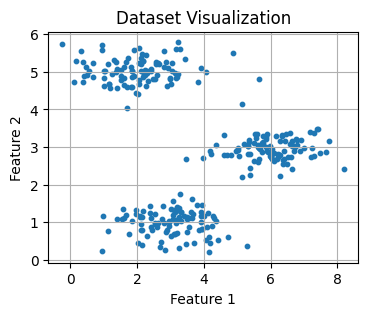

In [ ]:
import matplotlib.pyplot as plt

X = data['X']

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Finding Closest Centroids

In [ ]:
import numpy as np

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (np.ndarray): (m, n) Input data points
        centroids (np.ndarray): (K, n) K centroids, each row is a centroid

    Returns:
        idx (np.ndarray): (m,) closest centroid, range is [0, K-1]
    """
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        min_distance = float('inf')
        for j in range(K):
            distance = np.linalg.norm(X[i] - centroids[j])
            if distance < min_distance:
                min_distance = distance
                idx[i] = j

    return idx

In [ ]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)

print("Closest centroid for the first 3 data points:")
print(idx[:3])

Closest centroid for the first 3 data points:
[0 2 1]


## Computing Centroids

In [ ]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.

    Args:
        X (np.ndarray):   (m, n) Input data points
        idx (np.ndarray): (m,)   Closest centroid for each data point
        K (int):          Number of centroids

    Returns:
        centroids (np.ndarray): (K, n) New centroids, each row is a centroid
    """
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        points_assigned_to_k = X[idx == k]
        if len(points_assigned_to_k) > 0:
            centroids[k, :] = np.mean(points_assigned_to_k, axis=0)

    return centroids

In [ ]:
# Use the initial_centroids and idx from the previous steps
K = initial_centroids.shape[0]
new_centroids = compute_centroids(X, idx, K)

print("New centroid locations:")
print(new_centroids)

New centroid locations:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## Running K-means

In [ ]:
def run_k_means(X, initial_centroids, max_iters):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example.

    Args:
        X (np.ndarray): Input data points (m, n)
        initial_centroids (np.ndarray): Initial centroids (K, n)
        max_iters (int): Number of iterations to run K-Means

    Returns:
        centroids (np.ndarray): Final centroids (K, n)
        idx (np.ndarray): Final centroid assignment for each data point (m,)
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m, dtype=int)

    for i in range(max_iters):
        print(f"K-Means iteration {i+1}/{max_iters}...")
        # Find the closest centroids for the examples
        idx = find_closest_centroids(X, centroids)

        # Compute new centroids
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [ ]:
# Run K-Means algorithm
max_iters = 10
K = initial_centroids.shape[0]
final_centroids, final_idx = run_k_means(X, initial_centroids, max_iters)

print("\nFinal Centroids:")
print(final_centroids)

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...

Final Centroids:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


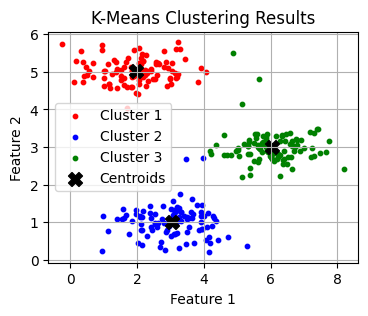

In [ ]:
# Visualize the clustered data
plt.figure(figsize=(4, 3))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown'] # Define colors for clusters

for i in range(K):
    cluster_points = X[final_idx == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, c=colors[i % len(colors)], label=f'Cluster {i+1}')

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Initializing Centroids

In [ ]:
def init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (np.ndarray): Data points
        K (int): Number of centroids

    Returns:
        centroids (np.ndarray): Initialized centroids
    """
    m = X.shape[0]
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(m)
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

In [ ]:
K = 3
initial_centroids_random = init_centroids(X, K)

print("Randomly initialized centroids:")
print(initial_centroids_random)

Randomly initialized centroids:
[[2.95177039 0.89583143]
 [0.47647355 5.13535977]
 [6.69451358 2.89056083]]


In [ ]:
# Run K-Means algorithm with randomly initialized centroids
max_iters = 10
K = initial_centroids_random.shape[0]
final_centroids_random, final_idx_random = run_k_means(X, initial_centroids_random, max_iters)

print("\nFinal Centroids with Random Initialization:")
print(final_centroids_random)

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...

Final Centroids with Random Initialization:
[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]


## Visualizing clustered data

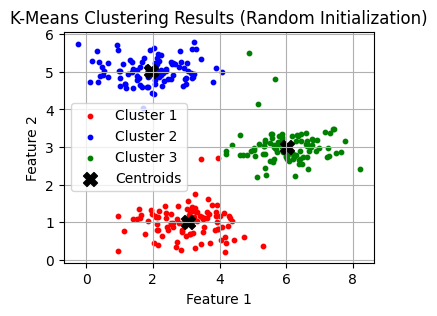

In [ ]:
# Visualize the clustered data with random initialization
plt.figure(figsize=(4, 3))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown'] # Define colors for clusters

for i in range(K):
    cluster_points = X[final_idx_random == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, c=colors[i % len(colors)], label=f'Cluster {i+1}')

plt.scatter(final_centroids_random[:, 0], final_centroids_random[:, 1], s=100, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering Results (Random Initialization)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

##**Conclusion**

The K-means clustering algorithm has been successfully implemented from scratch in Python. This involved:

*   Loading and visualizing the dataset.
*   Creating functions to find the closest centroids for each data point and to compute the new centroid locations based on the assigned points.
*   Developing a function to run the iterative K-means process.
*   Implementing a method to randomly initialize centroids.

By visualizing the clustering results with both fixed and random initializations, it was possible to observe how the starting positions of the centroids can influence the final cluster assignments and centroid locations. This hands-on implementation has provided a deeper understanding of the K-means algorithm's mechanics and the importance of initialization.

A## working K-means implementation capable of segmenting data into distinct groups and visualizing the results has been created.